In [3]:
from igramscraper.instagram import Instagram
from time import sleep
import pandas as pd
import pymongo

In [5]:
instagram = Instagram()
instagram.media = instagram.get_medias("cv19vaccinereactions", 1731) 
c = [cc.__dict__ for cc in instagram.media]
df = pd.DataFrame(c)

In [6]:
df.head()

,identifier,short_code,created_time,type,link,image_low_resolution_url,image_thumbnail_url,image_standard_resolution_url,image_high_resolution_url,square_images,...,location_slug,_is_new,_is_loaded,_is_load_empty,_is_fake,_modified,_data,modified,thumbnail_src,video_view_count
0,2519924891650635784,CL4klZ7gDgI,1614618477,sidecar,https://www.instagram.com/p/CL4klZ7gDgI,None,None,None,https://instagram.fcmn5-1.fna.fbcdn.net/v/t51....,[https://instagram.fcmn5-1.fna.fbcdn.net/v/t51...,...,None,False,True,False,False,None,{},1.614690e+09,https://instagram.fcmn5-1.fna.fbcdn.net/v/t51....,NaN
1,2519495628552168574,CL3C-zhAGR-,1614567305,sidecar,https://www.instagram.com/p/CL3C-zhAGR-,None,None,None,https://instagram.fcmn5-1.fna.fbcdn.net/v/t51....,[https://instagram.fcmn5-1.fna.fbcdn.net/v/t51...,...,None,False,True,False,False,None,{},1.614690e+09,https://instagram.fcmn5-1.fna.fbcdn.net/v/t51....,NaN
2,2519022023599170142,CL1XS8iA6Je,1614510847,sidecar,https://www.instagram.com/p/CL1XS8iA6Je,None,None,None,https://instagram.fcmn5-1.fna.fbcdn.net/v/t51....,[https://instagram.fcmn5-1.fna.fbcdn.net/v/t51...,...,None,False,True,False,False,None,{},1.614690e+09,https://instagram.fcmn5-1.fna.fbcdn.net/v/t51....,NaN
3,2518882278910865611,CL03hZJgjDL,1614494188,sidecar,https://www.instagram.com/p/CL03hZJgjDL,None,None,None,https://instagram.fcmn5-1.fna.fbcdn.net/v/t51....,[https://instagram.fcmn5-1.fna.fbcdn.net/v/t51...,...,None,False,True,False,False,None,{},1.614690e+09,https://instagram.fcmn5-1.fna.fbcdn.net/v/t51....,NaN
4,2518779644795299453,CL0gL3rgiZ9,1614481953,sidecar,https://www.instagram.com/p/CL0gL3rgiZ9,None,None,None,https://instagram.fcmn5-1.fna.fbcdn.net/v/t51....,[https://instagram.fcmn5-1.fna.fbcdn.net/v/t51...,...,None,False,True,False,False,None,{},1.614690e+09,https://instagram.fcmn5-1.fna.fbcdn.net/v/t51....,NaN


In [11]:
df.columns

Index(['identifier', 'short_code', 'created_time', 'type', 'link',
       'image_low_resolution_url', 'image_thumbnail_url',
       'image_standard_resolution_url', 'image_high_resolution_url',
       'square_images', 'carousel_media', 'caption', 'is_ad',
       'video_low_resolution_url', 'video_standard_resolution_url',
       'video_low_bandwidth_url', 'video_views', 'video_url', 'owner',
       'likes_count', 'location_id', 'location_name', 'comments_count',
       'comments', 'has_more_comments', 'comments_next_page', 'location_slug',
       '_is_new', '_is_loaded', '_is_load_empty', '_is_fake', '_modified',
       '_data', 'modified', 'thumbnail_src', 'video_view_count'],
      dtype='object')

In [57]:
# voila la structure de notre document 

Post={  }
Post['Post_identifier']      =df["identifier"][0]
Post['Post_Caption']         =df["caption"][0]
Post['Post_comments_count']  =df["comments_count"][0]
Post['Post_likes_count']     =df["likes_count"][0]
Post['Post_Comments']        =df['comments']
Post

In [10]:
myclient = pymongo.MongoClient("mongodb://localhost:27017/")
mydb = myclient["Social_listning1"]
mycol = mydb["Post_Comments_istagram"]

In [9]:
data = []
not_save = []
import json
for id_com in df[['identifier','comments_count','caption','comments_count','likes_count']].values:
    try:
        list_comments=[]
        post1 = dict(instagram.get_media_comments_by_id(id_com[0], id_com[1]))
        sleep(5)
        
        Post={  }
        Post['Post_identifier']=id_com[0]
        Post['Post_Caption']=id_com[2]
        Post['Post_comments_count']=id_com[3]
        Post['Post_likes_count']=id_com[4]
        for a in post1['comments']:
            list_comments.append(a.text)
        Post['Post_Comments']=list_comments
        print(list_comments[0])
        x = mycol.insert_one(dict(Post))
        data.append(dict(Post))
        print(dict(Post))
        
    except:
        print("il y a un erreur dans ")
        not_save.append(id_com)
        sleep(10)

Disgusting. Effen liars.
{'Post_identifier': '2519924891650635784', 'Post_Caption': 'This article is predominantly about how there are more dangerous strains of COVID killing younger people. I’m not convinced *that* is what they should be focusing on… link will be posted in my story.', 'Post_comments_count': 292, 'Post_likes_count': 2929, 'Post_Comments': ['Disgusting. Effen liars.', 'New variants my butt!!! New experimental vaccines 💉', 'I feel impressed with @vanessa.abreu_fx for a wonderful work well done... just 6 days after I took a risk to give a try of $2000 I received a payment fee of $22,540 @vanessa.abreu_fx', 'Do you think the doctors are giving them medicine that somehow activate the poison in these💉?', 'This pegged my BS detector! Its clear they are pushing for more vaccines and using deaths from vaccine and calling it a new variant to justify MORE vaccines. One question, where is the actual electron microscope proof of the vaccine? When and where was it taken from infecte

In [1]:
# paritie scraping avec api twint

In [25]:
import twint
import pymongo
import nest_asyncio
import json
import pandas as pd
import matplotlib.pyplot as plt

In [15]:
# le nom de fichier pour stocker les donnees avant le stocker dans mongodb
file_data_ = "file_data_.json"

In [13]:
def search_tweet(search, nbrtweet):
    global file_data_
    with open(file_data_, "w") as f:
        pass
    nest_asyncio.apply()
    c = twint.Config()
    c.Search = search 
    c.Limit = nbrtweet
    c.Hide_output = True
    c.Store_json = True
    c.Output = file_data_
    twint.run.Search(c)

In [14]:
search_tweet("covid vaccine", 100)

In [17]:
myclient = pymongo.MongoClient("mongodb://localhost:27017/")
mydb = myclient["dbtweet"]
mycol = mydb['covid']

In [18]:
with open(file_data_, encoding='utf-8') as fout:
        lines = fout.readlines()
        for line in lines:
            linejson = json.loads(line)
            x = mycol.insert_one(linejson)

In [20]:
df = pd.read_json(file_data_, lines=True)

In [23]:
df.head(2)

,id,conversation_id,created_at,date,time,timezone,user_id,username,name,place,...,geo,source,user_rt_id,user_rt,retweet_id,reply_to,retweet_date,translate,trans_src,trans_dest
0,1366764144561692677,1365036784481153024,2021-03-02 15:55:39+01:00,2021-03-02,15:55:39,100,1021097105258098689,gnrsmiffies,gnrsmiffies,,...,,,,,,"[{'screen_name': 'BesfordPhil', 'name': 'Besfo...",,,,
1,1366764137397690371,1366764137397690368,2021-03-02 15:55:38+01:00,2021-03-02,15:55:38,100,462640892,larrystcroix,Larry StCroix,,...,,,,,,[],,,,


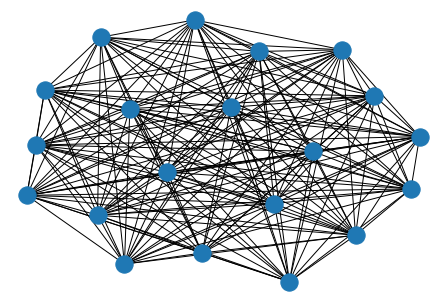

In [26]:
import networkx as nx
g = nx.newman_watts_strogatz_graph(20, 15, 0.35, seed = 12345 )
plt.figure()
nx.draw(g)

In [28]:
l=[]
for i in df[['username','language']].values :
    l.append(i)

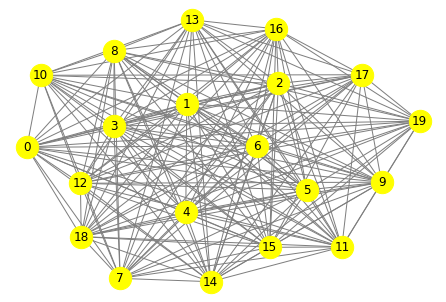

In [29]:
for n in g.nodes:
    g.nodes[n]['User']=l[n]
options = {
      'node_color' : 'yellow',
      'node_size'  : 500,
      'edge_color' : 'tab:grey',
      'with_labels': True
    }
plt.figure()
nx.draw(g,**options)
plt.show()

In [30]:
print(g.degree())
#Cherchons le degré le plus élevé :
import numpy as np
degre_max = max(np.array(g.degree())[:,1])
print(degre_max)

[(0, 19), (1, 19), (2, 19), (3, 19), (4, 17), (5, 18), (6, 19), (7, 18), (8, 18), (9, 19), (10, 17), (11, 19), (12, 18), (13, 18), (14, 19), (15, 19), (16, 19), (17, 17), (18, 18), (19, 17)]
19


In [31]:
#Puis les positions user ayant ce degré :
index_max = [i for i,j in g.degree() if j == degre_max]
print(index_max)

[0, 1, 2, 3, 6, 9, 11, 14, 15, 16]


In [32]:
users = [ g.nodes[i]["User"] for i in index_max ]
print(users)

[array(['gnrsmiffies', 'en'], dtype=object), array(['larrystcroix', 'en'], dtype=object), array(['actualcandrews', 'en'], dtype=object), array(['8_i_am_negan_8', 'en'], dtype=object), array(['funtrafoo', 'en'], dtype=object), array(['amazingsmp', 'en'], dtype=object), array(['nguyenthangngay', 'en'], dtype=object), array(['taylorchasefl', 'en'], dtype=object), array(['simon_wookey', 'en'], dtype=object), array(['ntvtelugulive', 'en'], dtype=object)]
